 ---------------------------------------------------------
## 1. IMPORT LIBRARY
 ---------------------------------------------------------
 Pada tahap ini, kita memanggil semua library yang diperlukan
 untuk memuat dataset, preprocessing gambar, membuat model CNN,
 serta visualisasi.

In [45]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


 ---------------------------------------------------------
 2. LOAD DATASET YANG SUDAH DIBAGI (TRAIN & TEST)
 ---------------------------------------------------------
 Kita memasukkan path folder dataset.
 Dataset kamu berada di folder Tomato Leaf Disease.
 Pastikan di dalamnya sudah ada folder: train/ dan test/

Found 15064 files belonging to 10 classes.
Kelas: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


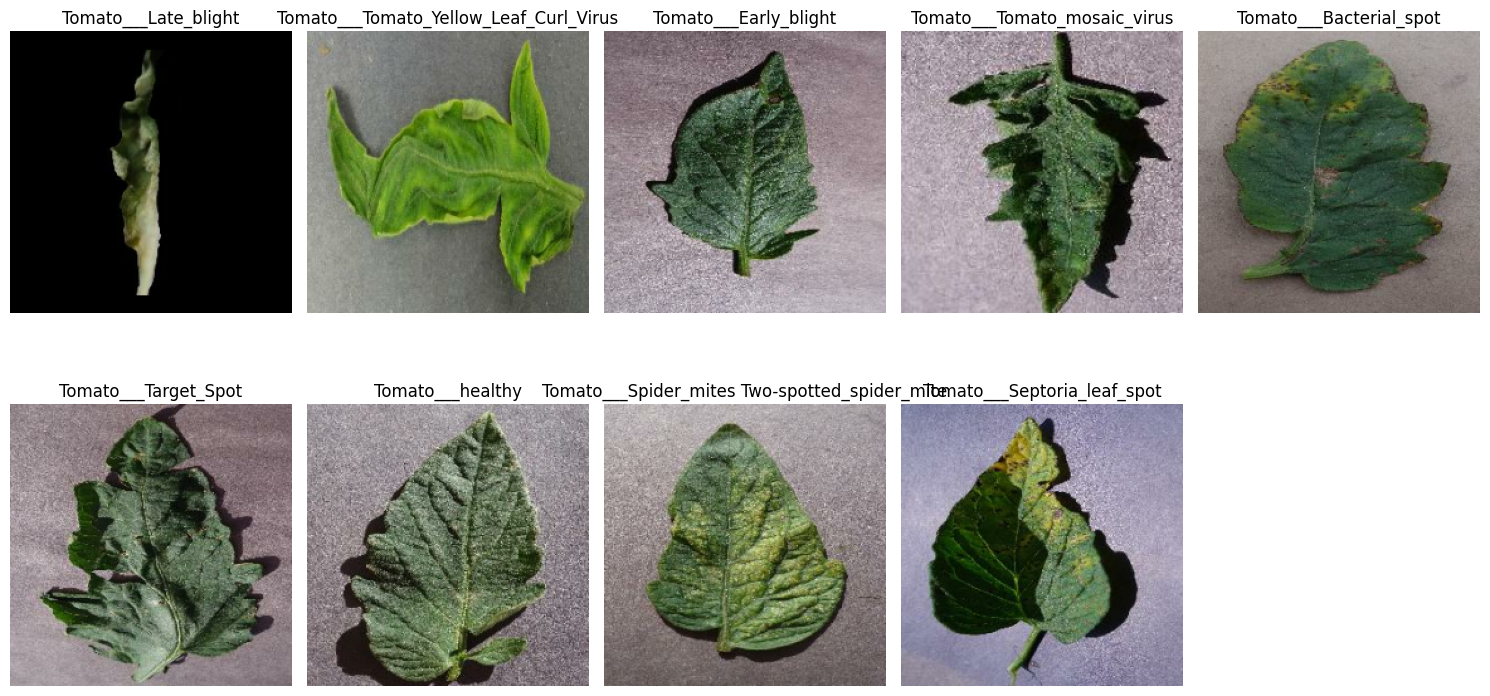

In [46]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=50,     # lebih besar supaya dapat semua kelas
    shuffle=True
)

class_names = train_ds.class_names
print("Kelas:", class_names)

# Ambil batch pertama
for images, labels in train_ds.take(1):
    plt.figure(figsize=(15, 8))

    shown_classes = set()
    index = 1

    for i in range(len(images)):
        label = labels[i].numpy()
        class_name = class_names[label]

        # Tampilkan hanya 1 gambar per kelas
        if class_name not in shown_classes:
            plt.subplot(2, 5, index)   # 2 baris x 5 kolom = 10 gambar
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")

            shown_classes.add(class_name)
            index += 1

        # Jika sudah 10 kelas, stop
        if len(shown_classes) == 10:
            break

    plt.tight_layout()
    plt.show()
    break


 ---------------------------------------------------------
 # 3. PREPROCESSING DENGAN ImageDataGenerator
 ---------------------------------------------------------
 Pada bagian ini kita melakukan:
   - Resize gambar
   - Normalisasi pixel (0–255 menjadi 0–1)
   - Augmentasi untuk data training


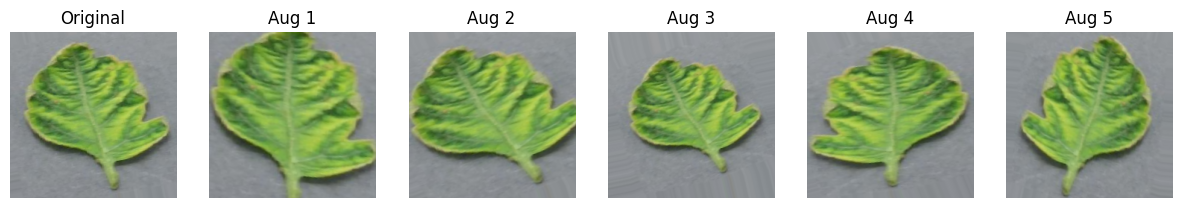

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Buat generator AUGMENTASI TANPA RESCALE
# ---------------------------
augment_only = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# ---------------------------
# Ambil 1 gambar dari TRAIN
# ---------------------------
images, labels = next(train_data)
original = images[0]   # sudah 0–1
original_uint8 = (original * 255).astype("uint8")

# ---------------------------
# Generate 5 augmentasi acak (dengan deteksi normalisasi)
# ---------------------------
augmented_images = []

for i in range(5):
    aug_batch = next(augment_only.flow(
        np.expand_dims(original, axis=0),
        batch_size=1
    ))

    aug_img = aug_batch[0]

    # DETEKSI otomatis apakah perlu normalisasi
    if aug_img.max() > 1.0:
        # berarti 0–255, normalisasi dulu
        aug_img_norm = aug_img / 255.0
    else:
        # sudah 0–1, jangan normalisasi lagi
        aug_img_norm = aug_img

    # tampilkan dalam format RGB uint8
    aug_img_uint8 = (aug_img_norm * 255).astype("uint8")
    augmented_images.append(aug_img_uint8)

# ---------------------------
# Plot grid
# ---------------------------
plt.figure(figsize=(15, 4))

plt.subplot(1, 6, 1)
plt.imshow(original_uint8)
plt.title("Original")
plt.axis("off")

for i in range(5):
    plt.subplot(1, 6, i+2)
    plt.imshow(augmented_images[i])
    plt.title(f"Aug {i+1}")
    plt.axis("off")

plt.show()
    